C:\Users\HARISH\AppData\Local\Temp\ipykernel_25732\883065975.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_values = moving_avg[-1]  # Last smoothed value as a baseline forecast
C:\Users\HARISH\AppData\Local\Temp\ipykernel_25732\883065975.py:22: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=ts.index[-1], periods=future_steps + 1, freq="M")[1:]


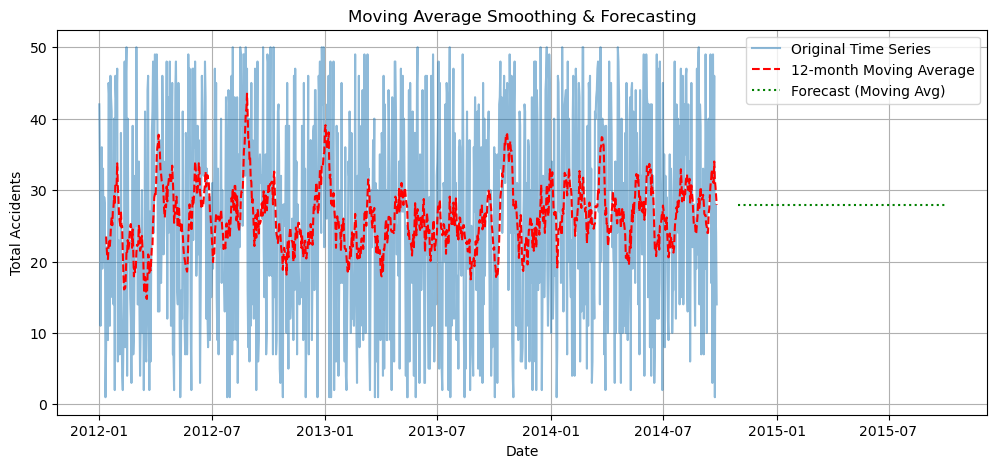

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the time series data
file_path = r"C:\Users\HARISH\Downloads\accident_time_series_1000_rows.csv"
df = pd.read_csv(file_path, parse_dates=["Date"], index_col="Date")

# Verify column
if "Total Accidents" not in df.columns:
    raise ValueError("Column 'Total Accidents' not found.")

ts = df["Total Accidents"].dropna()

# Apply Moving Average Smoothing
window_size = 12  # 12-month moving average
moving_avg = ts.rolling(window=window_size).mean()

# Forecasting using Moving Average
future_steps = 12  # Forecast for next 12 months
forecast_values = moving_avg[-1]  # Last smoothed value as a baseline forecast
future_dates = pd.date_range(start=ts.index[-1], periods=future_steps + 1, freq="M")[1:]
forecast_series = pd.Series([forecast_values] * future_steps, index=future_dates)

# Plot Original, Smoothed & Forecasted Series
plt.figure(figsize=(12, 5))
plt.plot(ts, label="Original Time Series", alpha=0.5)
plt.plot(moving_avg, label=f"{window_size}-month Moving Average", color="red", linestyle="dashed")
plt.plot(forecast_series, label="Forecast (Moving Avg)", color="green", linestyle="dotted")
plt.xlabel("Date")
plt.ylabel("Total Accidents")
plt.title("Moving Average Smoothing & Forecasting")
plt.legend()
plt.grid(True)
plt.show()
